#Libraries and data

In [ ]:
!pip install pmdarima

In [2]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/5. Sarimax

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/5. Sarimax


In [3]:
#import libraries
import numpy as np
import pandas as pd

In [4]:
#load the data
df = pd.read_csv("Churrasco.csv",
                 index_col = 'Week',
                 parse_dates = True)
df.head()

,Churrasco,Easter,Carnaval,Republic
Week,,,,
2016-01-31,42,0,0,0
2016-02-07,45,0,1,0
2016-02-14,40,0,0,0
2016-02-21,36,0,0,0
2016-02-28,39,0,0,0


#Preparation

In [5]:
#change index
df = df.asfreq("W")
df.index

DatetimeIndex(['2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06', '2016-03-13', '2016-03-20',
               '2016-03-27', '2016-04-03',
               ...
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24'],
              dtype='datetime64[ns]', name='Week', length=261, freq='W-SUN')

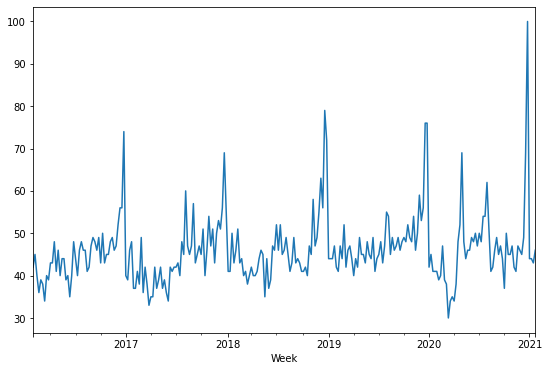

In [6]:
#Viz
df.Churrasco.plot(figsize = (9,6))

In [7]:
#Training and test set
test_weeks = 10
training_set = df.iloc[:-test_weeks, :]
test_set = df.iloc[-test_weeks:, :]
test_set.head()

,Churrasco,Easter,Carnaval,Republic
Week,,,,
2020-11-22,47,0,0,0
2020-11-29,46,0,0,0
2020-12-06,45,0,0,0
2020-12-13,49,0,0,0
2020-12-20,69,0,0,0


#SARIMAX

In [8]:
#Exogenous VAriables
train_exog = training_set.iloc[:, 1:]
test_exog = test_set.iloc[:, 1:]

In [10]:
#SARIMAX
from pmdarima import auto_arima
model = auto_arima(y = training_set.Churrasco,
                   X = train_exog,
                   m = 52,
                   stepwise = True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 52)   Log Likelihood                -775.817
Date:                            Wed, 05 May 2021   AIC                           1567.633
Time:                                    05:55:54   BIC                           1595.837
Sample:                                01-31-2016   HQIC                          1578.983
                                     - 11-15-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.2425      1.481      6.241      0.000       6.340      12.145
Easter        -0.1791      2.834     -0.063      0.950      -5.733       5.375
Carnaval       3.5224      1.958      1.799      0.072      -0.316       7.361
Republic      11.9845      1.207      9.931      0.000       9.619      14.350
ar.L1          0.4741      0.046     10.210      0.000       0.383       0.565
ar.L2          0.1102      0.056      1.960      0.050    2.87e-05       0.220
ar.S.L52       0.5167      0.041     12.698      0.000       0.437       0.596
sigma2        23.2329      1.669     13.919      0.000      19.962      26.504
===================================================================================
Ljung-Box (L1) (Q):                   1.98   Jarque-Bera (JB):                54.91
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.44
Prob(H) (two-sided):                  0.44   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
#Predictions
predictions = pd.Series(model.predict(n_periods= test_weeks,
                        X = test_exog)).rename("SARIMAX")
predictions.index = test_set.index
predictions.head(1)

Week
2020-11-22    39.801222
Freq: W-SUN, Name: SARIMAX, dtype: float64

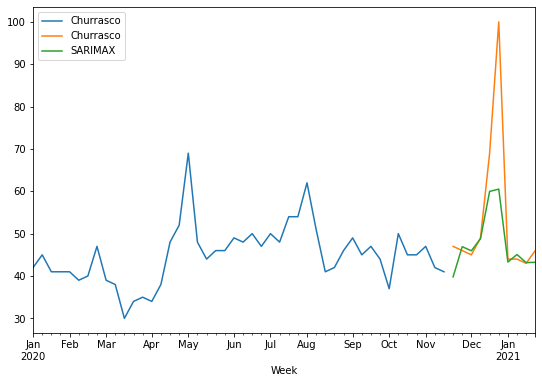

In [12]:
#Plotting
training_set.Churrasco['2020-01-01':].plot(legend = True, 
                                           figsize = (9,6))
test_set.Churrasco.plot(legend = True)
predictions.plot(legend = True)

In [14]:
#MAPE
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set.Churrasco, predictions)

8.282450003824282